In [1]:
import cv2
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
1# Do not modify this part!

class ImageAnalyser():
  def __init__(self, path):
    self.path = path

  def run(self):
    result_list = []
    for path in os.listdir(self.path):
      if path.split(".")[-1] == "jpg":
        no_ext_path = path.strip(".jpg")
        result = self.analyse(path)
        # info = no_ext_path.split(" ")[-2:]
        # info.extend([str(result)])
        # result_list.append(info)
        result_list.append([no_ext_path, str(result)])
    # df = pd.DataFrame(result_list, columns=["Parameter 1", "Parameter 2", "Tumor Cell Adhesion (% of bright pixels)"])
    # df = pd.DataFrame(result_list, columns=["Parameter 1", "Parameter 2", "Tumor Cell Adhesion (absolute amount of pixels)"])
    df = pd.DataFrame(result_list, columns=["Filename", "Tumor Cell Adhesion (absolute amount of pixels)"])
    df_sorted = df.sort_values(by=["Filename"])
    print(df_sorted)
    df_sorted["Tumor Cell Adhesion (absolute amount of pixels)"] = pd.to_numeric(df_sorted["Tumor Cell Adhesion (absolute amount of pixels)"])
    plt.figure(figsize=(20,10))
    plt.xticks(rotation=90)
    plt.bar(df_sorted["Filename"], df_sorted["Tumor Cell Adhesion (absolute amount of pixels)"])
    return df_sorted

  def analyse(self, path):
    img = cv2.imread(path)
    print(f"Original image: {path}\n")
    self.imgShow(img)

    # Denoising
    denoisedImg = cv2.fastNlMeansDenoising(img)
    img = cv2.cvtColor(denoisedImg,cv2.COLOR_BGR2GRAY)

    # Threshold (binary image)
    # thresh – threshold value.
    # maxval – maximum value to use with the THRESH_BINARY and THRESH_BINARY_INV thresholding types.
    # type – thresholding type
    th, threshedImg = cv2.threshold(img, 60, 255,cv2.THRESH_BINARY) # src, thresh, maxval, type

    # Perform morphological transformations using an erosion and dilation as basic operations
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
    morphImg = cv2.morphologyEx(threshedImg, cv2.MORPH_OPEN, kernel)

    # Find and draw contours
    contours, hierarchy = cv2.findContours(morphImg, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contoursImg = cv2.cvtColor(morphImg, cv2.COLOR_GRAY2RGB)
    cv2.drawContours(contoursImg, contours, -1, (255,255,255), 1)

    print("Processed image:\n")
    self.imgShow(contoursImg)

    number_of_white_pix = np.sum(threshedImg == 255)
    # number_of_total_pix = np.sum(threshedImg >= 0)
    # white_density = round((number_of_white_pix/number_of_total_pix)*100,3)
    # print(f"Relative amount of white pixels in image: {white_density} %")
    # print("\n\n------------------------------------------------------------------------------------------------------\n\n")
    print(f"Absolute amount of white pixels in image: {number_of_white_pix} pixels")
    print("\n\n------------------------------------------------------------------------------------------------------\n\n")
    return number_of_white_pix

  def imgShow(self, image):
    plt.figure(figsize=(10,6))
    plt.imshow(image, cmap = "gray")
    plt.show()

Original image: Adhesion of CRC cells to a HUVEC monolayer_Static conditions_IL-1B stim_Sg2.10_5.jpg



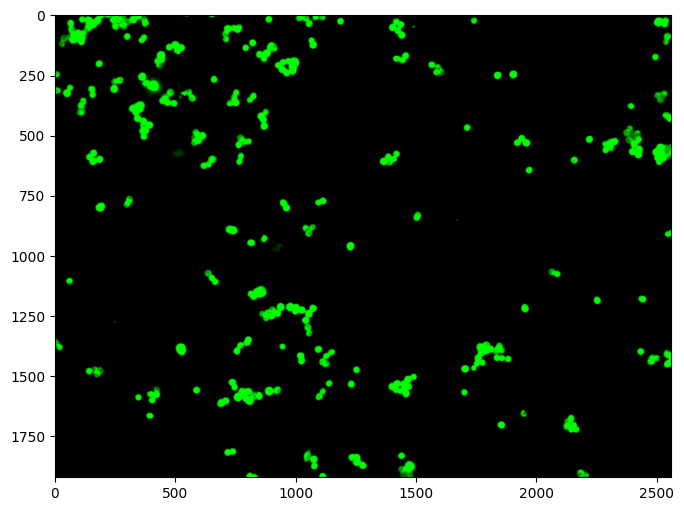

Processed image:



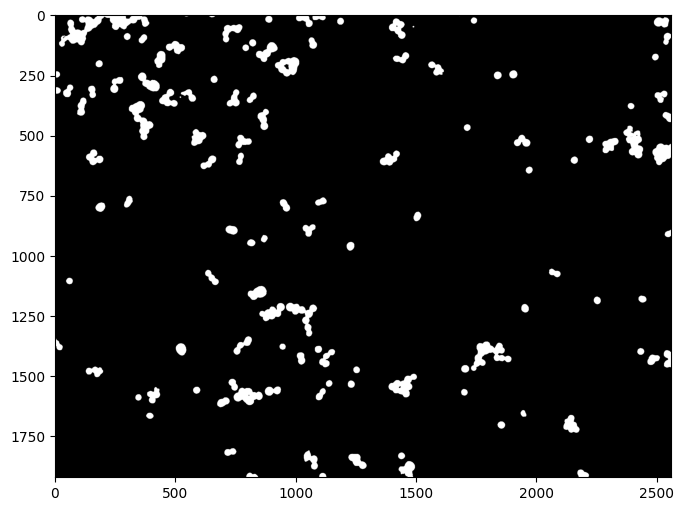

Absolute amount of white pixels in image: 219692 pixels


------------------------------------------------------------------------------------------------------


Original image: Adhesion of CRC cells to a HUVEC monolayer_Static conditions_IL-1B stim_Sg2.10_4.jpg



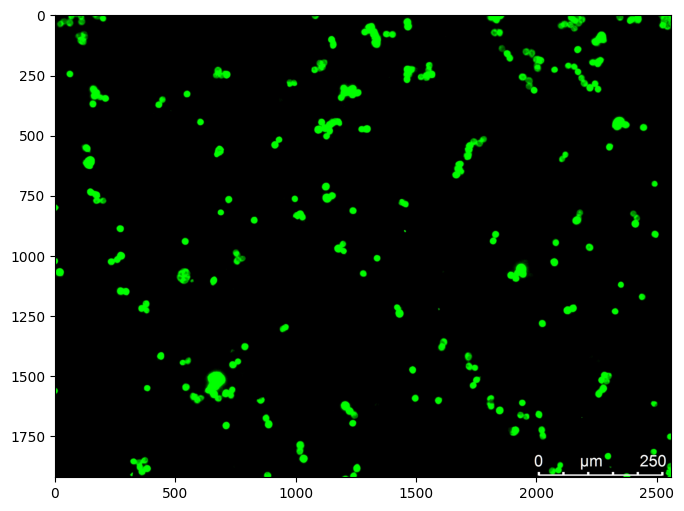

Processed image:



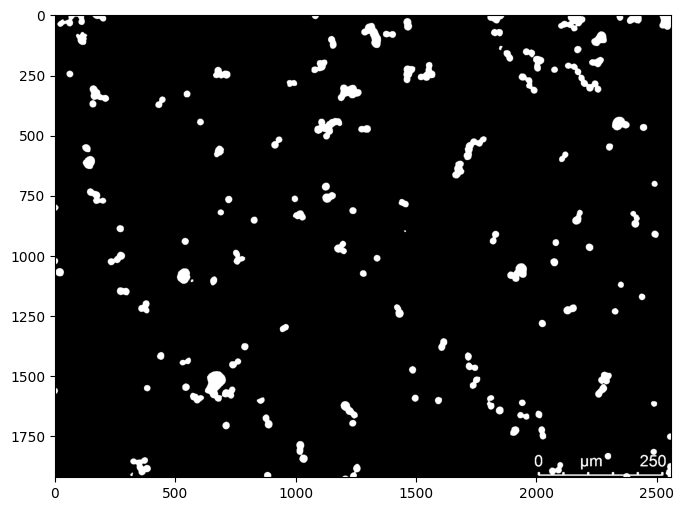

Absolute amount of white pixels in image: 197208 pixels


------------------------------------------------------------------------------------------------------


Original image: Adhesion of CRC cells to a HUVEC monolayer_Static conditions_IL-1B stim_NTC1.12_4.jpg



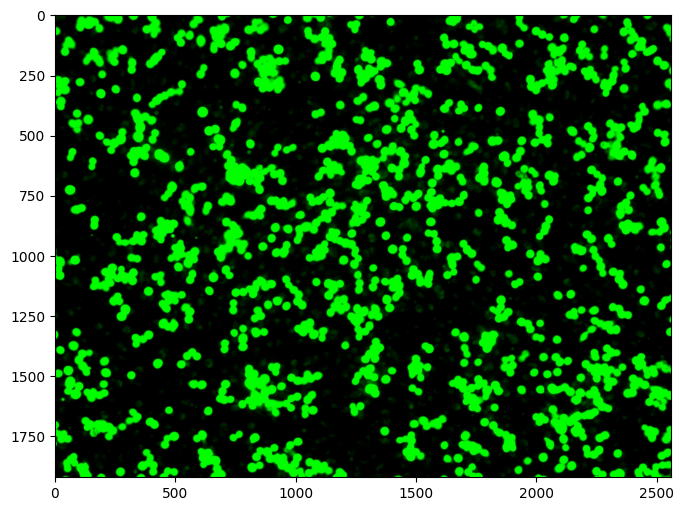

Processed image:



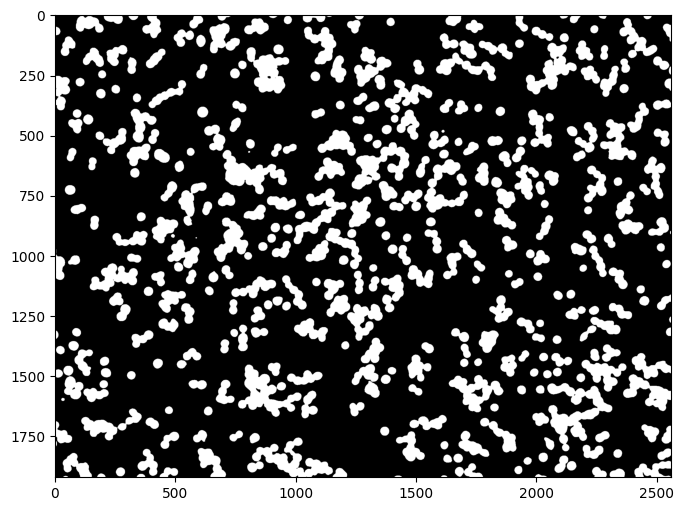

Absolute amount of white pixels in image: 1197757 pixels


------------------------------------------------------------------------------------------------------


Original image: Adhesion of CRC cells to a HUVEC monolayer_Static conditions_IL-1B stim_Sg2.10_3.jpg



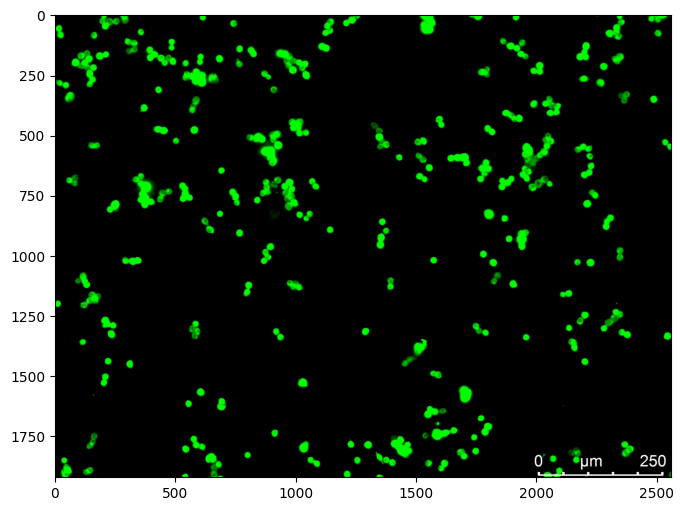

Processed image:



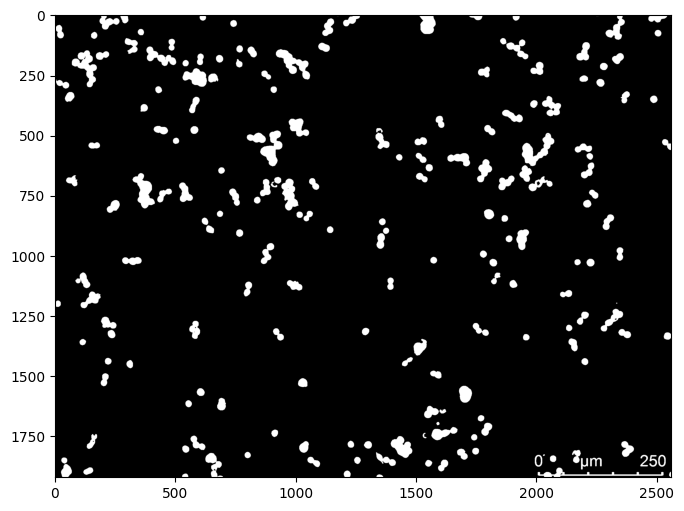

Absolute amount of white pixels in image: 289586 pixels


------------------------------------------------------------------------------------------------------


Original image: Adhesion of CRC cells to a HUVEC monolayer_Static conditions_IL-1B stim_NTC1.12_3.jpg



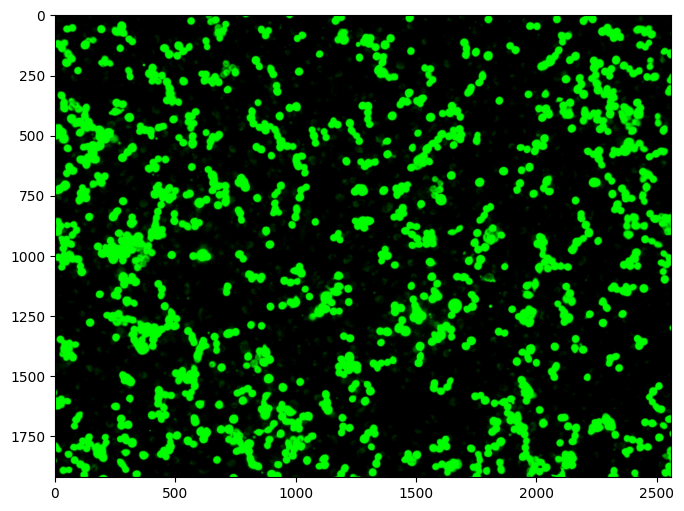

Processed image:



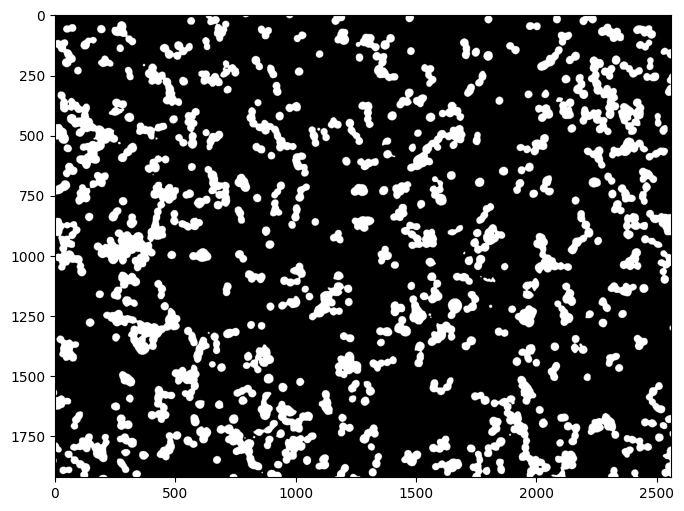

Absolute amount of white pixels in image: 1006759 pixels


------------------------------------------------------------------------------------------------------


Original image: Adhesion of CRC cells to a HUVEC monolayer_Static conditions_IL-1B stim_NTC1.12_5.jpg



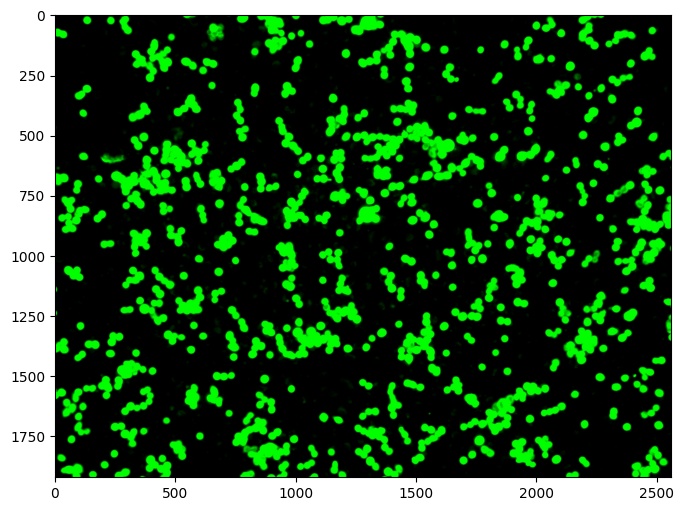

Processed image:



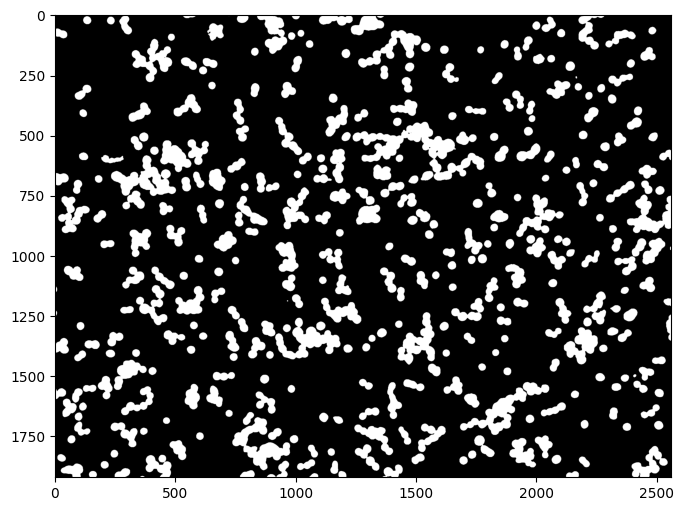

Absolute amount of white pixels in image: 932387 pixels


------------------------------------------------------------------------------------------------------


                                            Filename  \
4  Adhesion of CRC cells to a HUVEC monolayer_Sta...   
2  Adhesion of CRC cells to a HUVEC monolayer_Sta...   
5  Adhesion of CRC cells to a HUVEC monolayer_Sta...   
3  Adhesion of CRC cells to a HUVEC monolayer_Sta...   
1  Adhesion of CRC cells to a HUVEC monolayer_Sta...   
0  Adhesion of CRC cells to a HUVEC monolayer_Sta...   

  Tumor Cell Adhesion (absolute amount of pixels)  
4                                         1006759  
2                                         1197757  
5                                          932387  
3                                          289586  
1                                          197208  
0                                          219692  


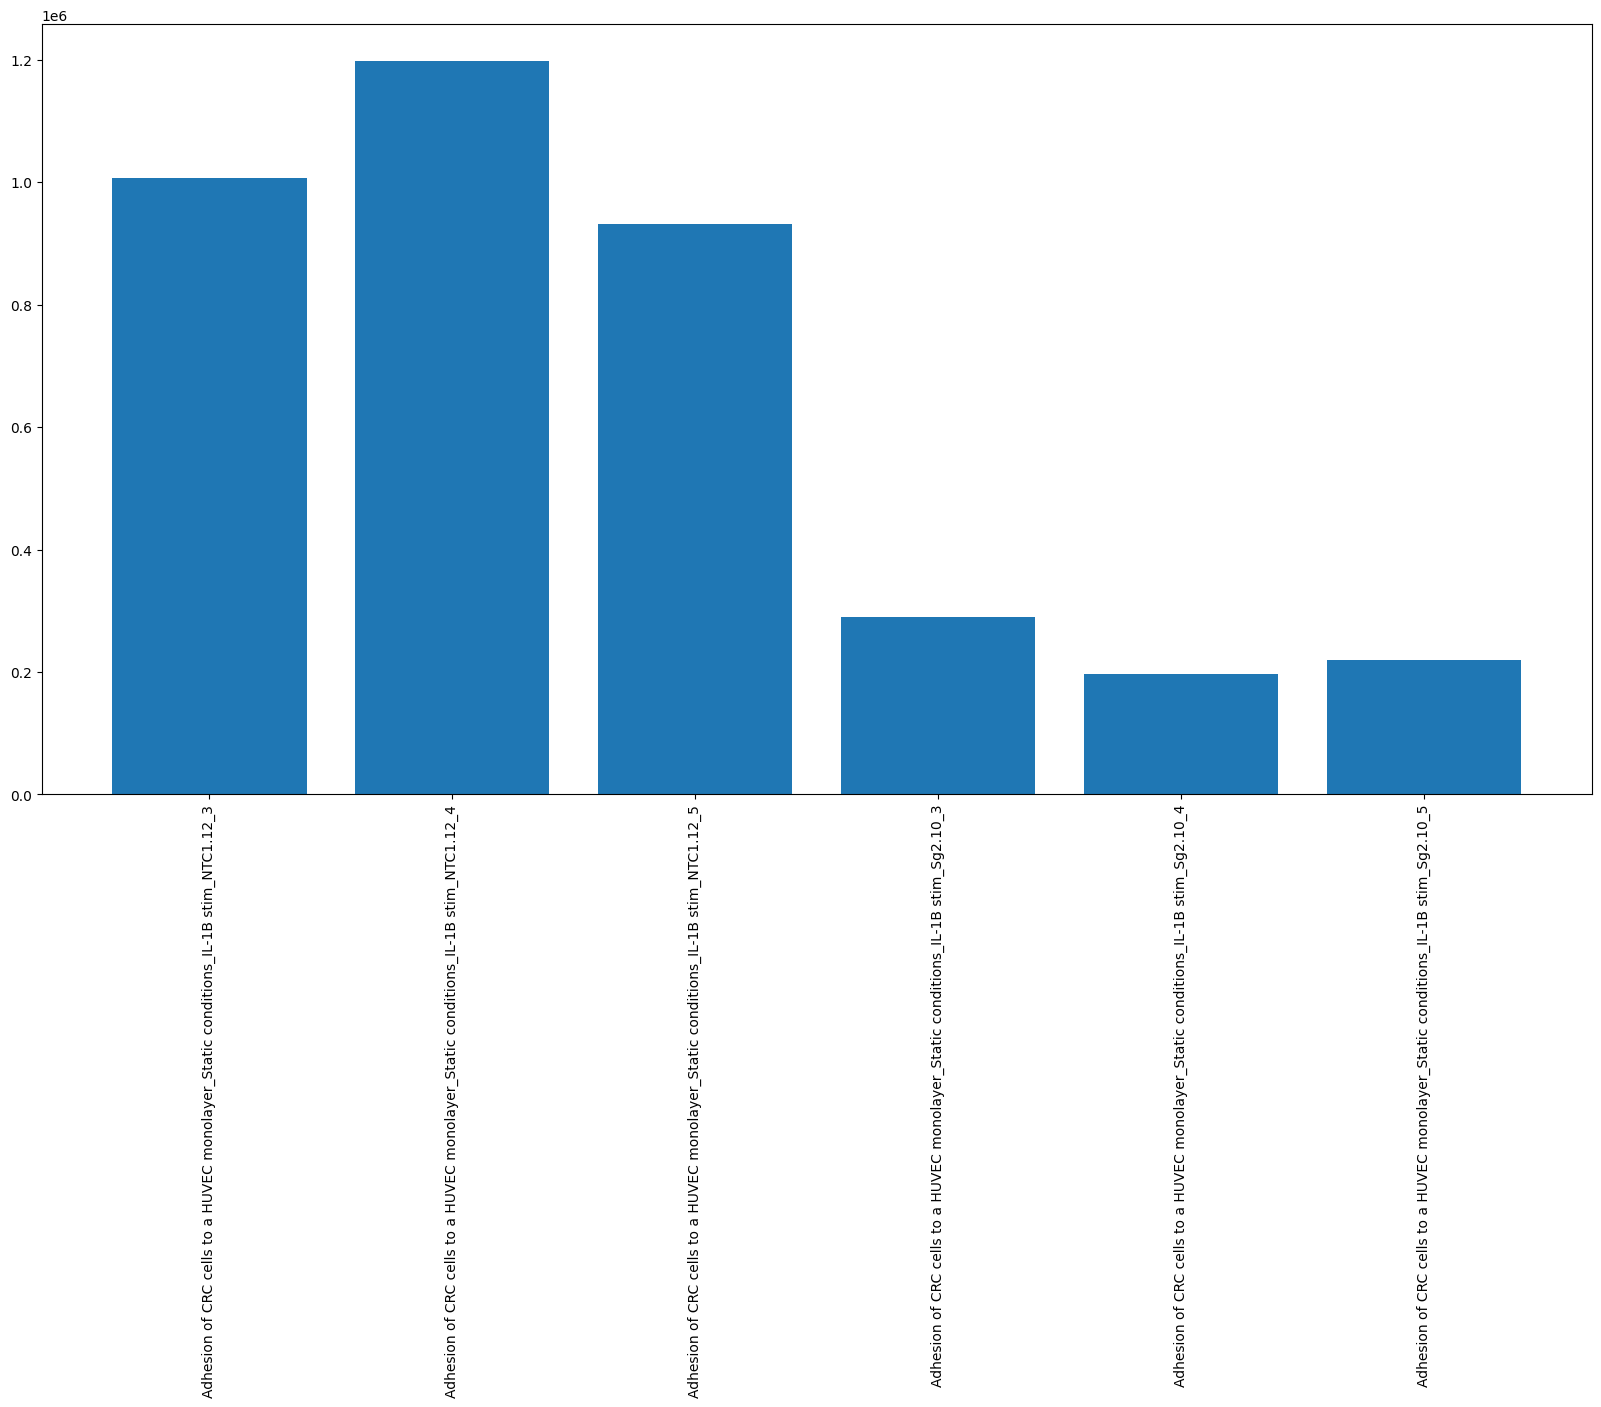

In [3]:
path = "/content/" # Change the path
img_analyser = ImageAnalyser(path)
table = img_analyser.run()

# Neuer Abschnitt

In [4]:
table

,Filename,Tumor Cell Adhesion (absolute amount of pixels)
1,Adhesion of CRC cells to a HUVEC monolayer_Sta...,1006759
5,Adhesion of CRC cells to a HUVEC monolayer_Sta...,1197757
4,Adhesion of CRC cells to a HUVEC monolayer_Sta...,932387
3,Adhesion of CRC cells to a HUVEC monolayer_Sta...,289586
2,Adhesion of CRC cells to a HUVEC monolayer_Sta...,197208
0,Adhesion of CRC cells to a HUVEC monolayer_Sta...,219692


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
table.to_csv("/content/table-2024-02-29.csv")